In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
# Reset warnings to default behavior
warnings.filterwarnings("default")

## Data Load

In [71]:
#Loading the CSV dataset into dataframe using pandas library

df_housing_2 = pd.read_csv("Datasets/House_Rent_Dataset.csv")

In [72]:
df_housing_2

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4627,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4628,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4629,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4630,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


## Exploratory Data Analysis

In [4]:
# Checking shape of dataset

df_housing_2.shape

(4632, 12)

In [5]:
# Getting info of the dataset

df_housing_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4632 entries, 0 to 4631
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4632 non-null   object
 1   BHK                4632 non-null   int64 
 2   Rent               4632 non-null   int64 
 3   Size               4632 non-null   int64 
 4   Floor              4632 non-null   object
 5   Area Type          4632 non-null   object
 6   Area Locality      4632 non-null   object
 7   City               4632 non-null   object
 8   Furnishing Status  4632 non-null   object
 9   Tenant Preferred   4632 non-null   object
 10  Bathroom           4632 non-null   int64 
 11  Point of Contact   4632 non-null   object
dtypes: int64(4), object(8)
memory usage: 434.4+ KB


In [6]:
# Posted On value is in date but the data type is object. Transforming it to date type
df_housing_2['Posted On'] = pd.to_datetime(df_housing_2['Posted On'])

In [7]:
# Checking info of the updated column
print(df_housing_2['Posted On'].dtype)

datetime64[ns]


In [8]:
# Checking number of columns in the dataset
df_housing_2.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [9]:
# Description of the dataset
df_housing_2.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4632.0,2.083981,0.830785,1.0,2.0,2.0,3.0,6.0
Rent,4632.0,35446.010363,78976.106746,1200.0,10000.0,16000.0,34000.0,3500000.0
Size,4632.0,964.262953,631.631187,20.0,550.0,850.0,1200.0,8000.0
Bathroom,4632.0,1.964810,0.884286,1.0,1.0,2.0,2.0,10.0


In [10]:
# Checking for null values
df_housing_2.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [11]:
# Check for duplicates in the DataFrame
duplicates = df_housing_2.duplicated()

# Print the total number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [12]:
# Checking how many types of Area Locality are present in data
df_housing_2['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'Murad Nagar, Lal Darwaza, Falaknuma Road',
       'Kakatiya Hills Madhapur', 'Manikonda, Hyderabad'], dtype=object)

In [13]:
# Getting count of unique values in Area Locality column
df_housing_2['Area Locality'].value_counts()

Bandra West                                     37
Gachibowli                                      29
Electronic City                                 24
Velachery                                       22
Madipakkam                                      20
                                                ..
Omkar Meridia, Bandra Kurla Complex              1
Orchid Suburbia, Bander Pakhadi                  1
Madhugiri Society, Chembur                       1
Thakur Jewel, Thakur Village, Kandivali East     1
Manikonda, Hyderabad                             1
Name: Area Locality, Length: 2201, dtype: int64

In [14]:
# Checking how many types of Area Type are present in data
df_housing_2['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [15]:
# Getting count of unique values in Area Type column
df_housing_2['Area Type'].value_counts()

Super Area     2366
Carpet Area    2264
Built Area        2
Name: Area Type, dtype: int64

In [16]:
# Checking how many types of Floor are present in data
df_housing_2['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [17]:
# Getting count of unique values in Floor column
df_housing_2['Floor'].value_counts()

1 out of 2         371
Ground out of 2    341
2 out of 4         306
2 out of 3         301
1 out of 3         286
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

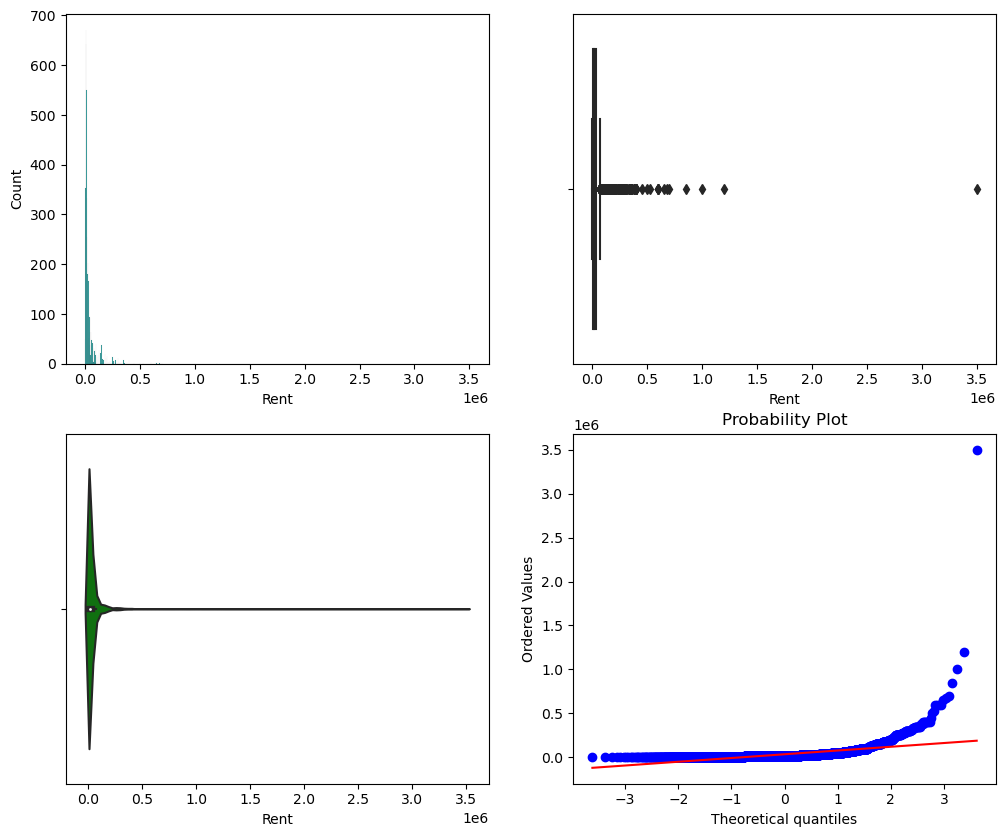

In [18]:
# Exploring Numerical variable Rent

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Create a histogram of the 'Rent' column
ax1 = sns.histplot(x=df_housing_2['Rent'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'Rent' column
ax2 = sns.boxplot(x=df_housing_2['Rent'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'Rent' column
ax3 = sns.violinplot(x=df_housing_2['Rent'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'Rent' column
ax4 = probplot(df_housing_2['Rent'], plot=plt)

# Show the plots
plt.show()

In [19]:
# Rent data is skewed, also have some outliers. Will remove the outlier and transform Rent data.
# Remove the maximum value from the 'Rent' column
max_rent = df_housing_2['Rent'].max()
df_housing_2 = df_housing_2[df_housing_2['Rent'] < max_rent]

# Perform the Box-Cox transformation on the rent column and store in new column 'BoxCox_Rent'
df_housing_2['BoxCox_Rent'], lam = boxcox(df_housing_2['Rent'])

# Print the lambda value used in the transformation
print('Lambda:', lam)

Lambda: -0.336511242986136


/var/folders/k1/d81qzwvn4y9gdfsg0tnjwzwh0000gn/T/ipykernel_8439/2467854900.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing_2['BoxCox_Rent'], lam = boxcox(df_housing_2['Rent'])


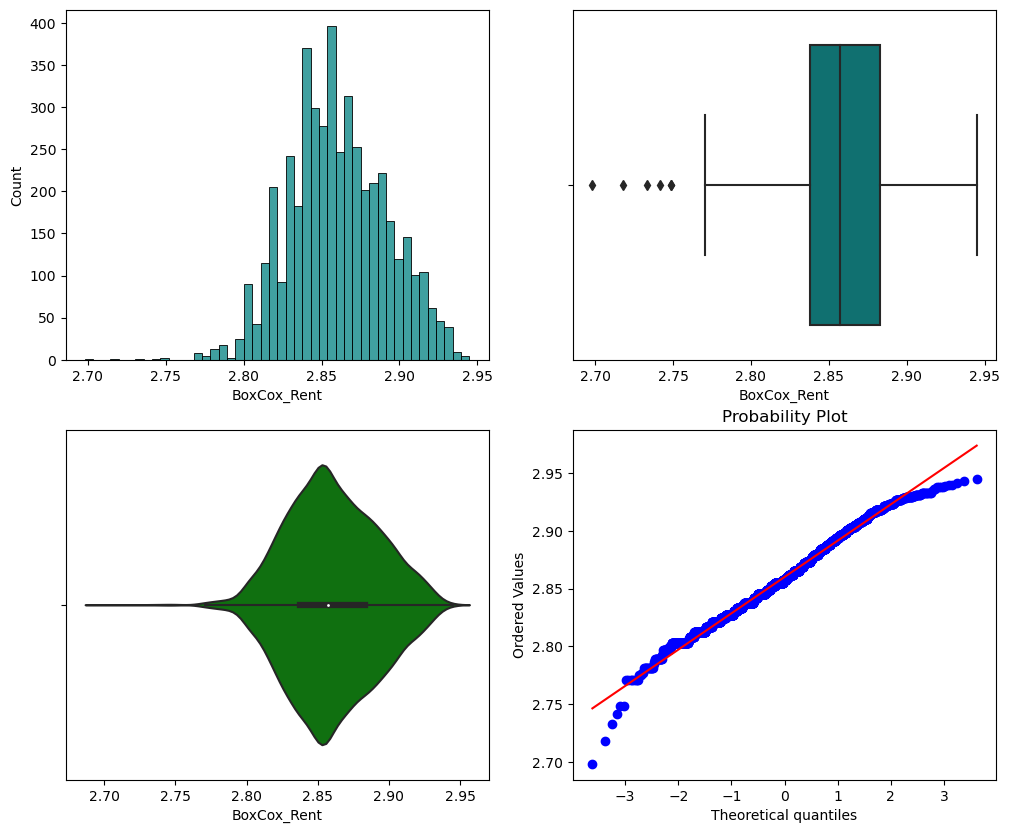

In [20]:
# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Create a histogram of the 'BoxCox_Rent' column
ax1 = sns.histplot(x=df_housing_2['BoxCox_Rent'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'BoxCox_Rent' column
ax2 = sns.boxplot(x=df_housing_2['BoxCox_Rent'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'BoxCox_Rent' column
ax3 = sns.violinplot(x=df_housing_2['BoxCox_Rent'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'BoxCox_Rent' column
ax4 = probplot(df_housing_2['BoxCox_Rent'], plot=plt)

# Show the plots
plt.show()

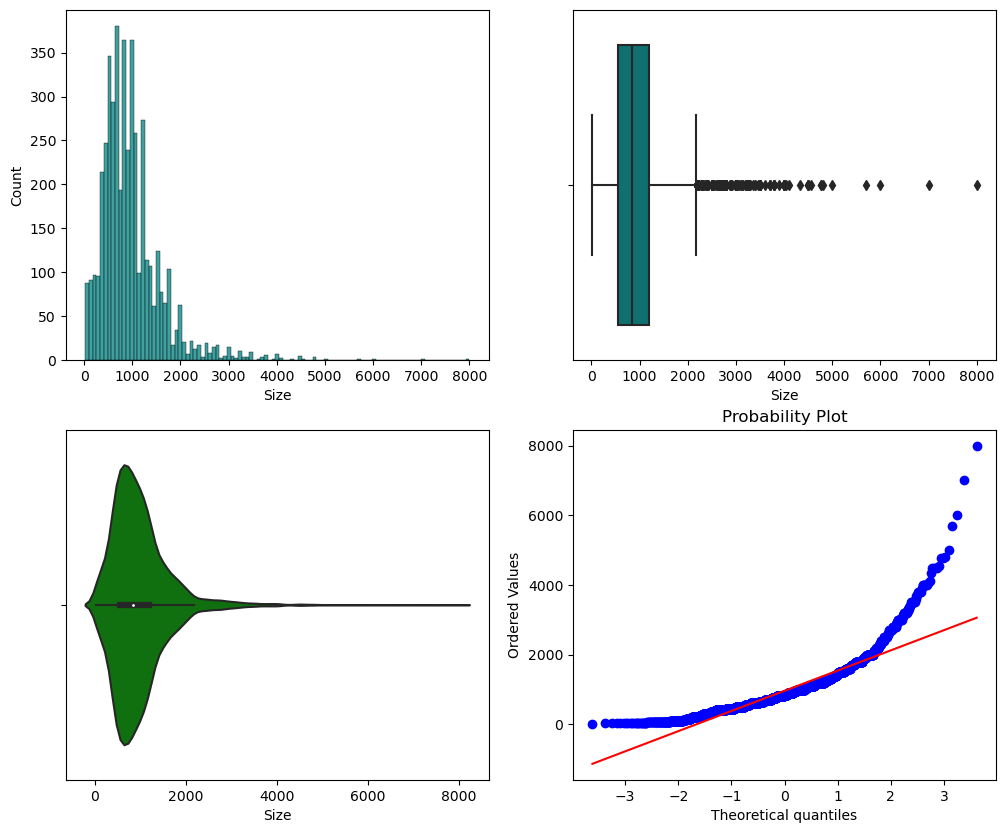

In [21]:
# Exploring Numerical variable Size

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Create a histogram of the 'Size' column
ax1 = sns.histplot(x=df_housing_2['Size'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'Size' column
ax2 = sns.boxplot(x=df_housing_2['Size'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'Size' column
ax3 = sns.violinplot(x=df_housing_2['Size'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'Size' column
ax4 = probplot(df_housing_2['Size'], plot=plt)

# Show the plots
plt.show()

In [22]:
# Size data is also skewed. Will Size data.
# Remove the maximum value from the 'Size' column
max_size = df_housing_2['Size'].max()
df_housing_2 = df_housing_2[df_housing_2['Size'] < max_rent]

# Perform the Box-Cox transformation on the rent column and store in new column 'BoxCox_Rent'
df_housing_2['BoxCox_Size'], lam = boxcox(df_housing_2['Size'])

# Print the lambda value used in the transformation
print('Lambda:', lam)

Lambda: 0.33275900382250406


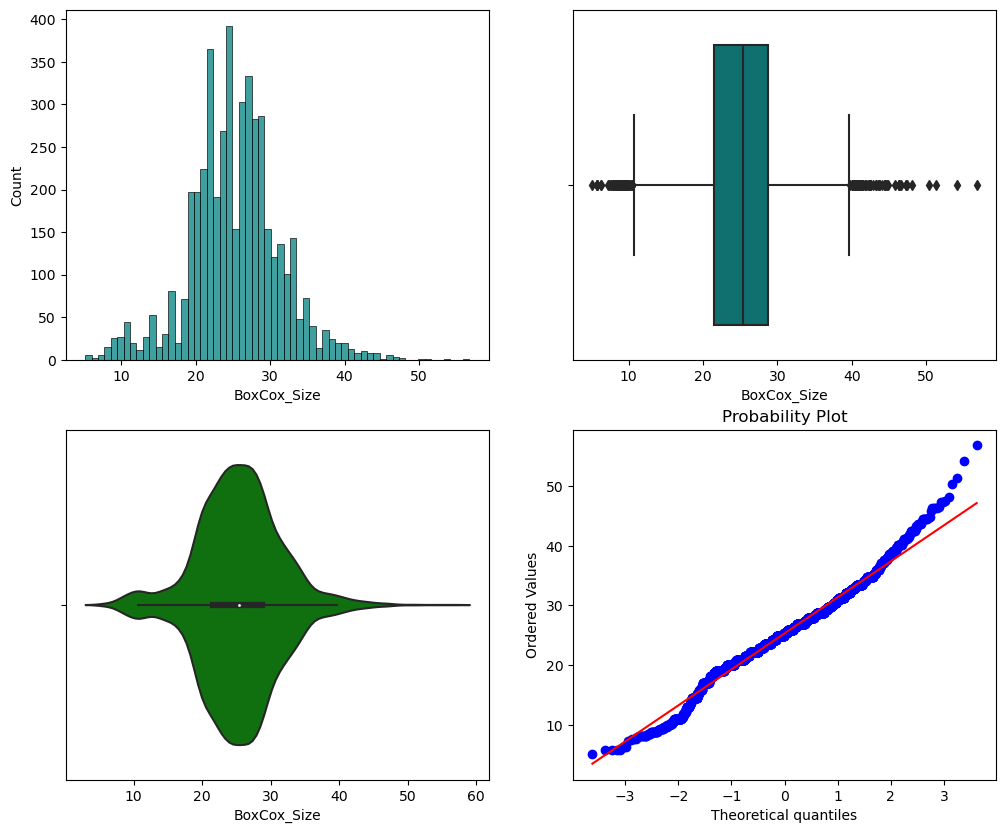

In [23]:
# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Create a histogram of the 'BoxCox_Size' column
ax1 = sns.histplot(x=df_housing_2['BoxCox_Size'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'BoxCox_Size' column
ax2 = sns.boxplot(x=df_housing_2['BoxCox_Size'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'BoxCox_Size' column
ax3 = sns.violinplot(x=df_housing_2['BoxCox_Size'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'BoxCox_Size' column
ax4 = probplot(df_housing_2['BoxCox_Size'], plot=plt)

# Show the plots
plt.show()

In [24]:
# After tranforming checking the dataframe
df_housing_2.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,BoxCox_Rent,BoxCox_Size
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2.837715,27.892154
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2.865584,24.785524
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2.859620,26.927612
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2.837715,24.785524
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2.824099,25.351850


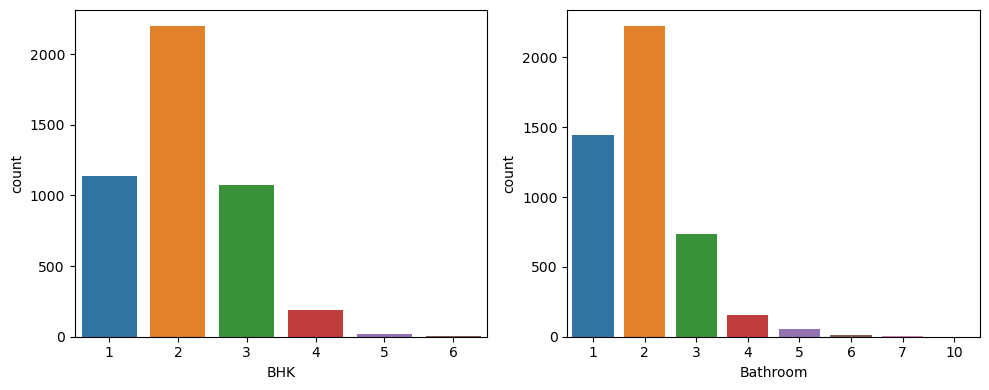

In [25]:
# Exploring Numerical variable BHK and Bathroom(As they are discrete,countplot has been done to check for outliers)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.countplot(x='BHK', data=df_housing_2, ax=axes[0])
sns.countplot(x='Bathroom', data=df_housing_2, ax=axes[1])

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Area Locality Pie Chart'}>

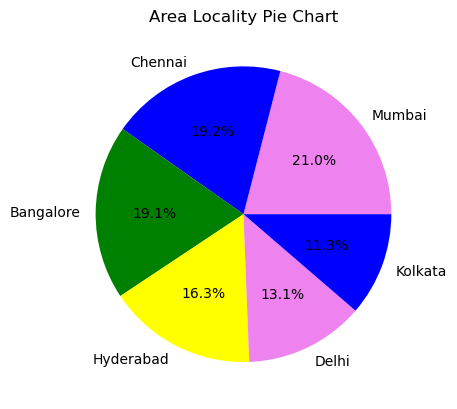

In [26]:
# Displaying detailed pie chart of Area Locality
df_housing_2['City'].value_counts().plot(kind= 'pie', colors=['violet', 'blue', 'green', 'yellow'], 
                                         title = 'Area Locality Pie Chart', ylabel = '',  autopct='%1.1f%%')

/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


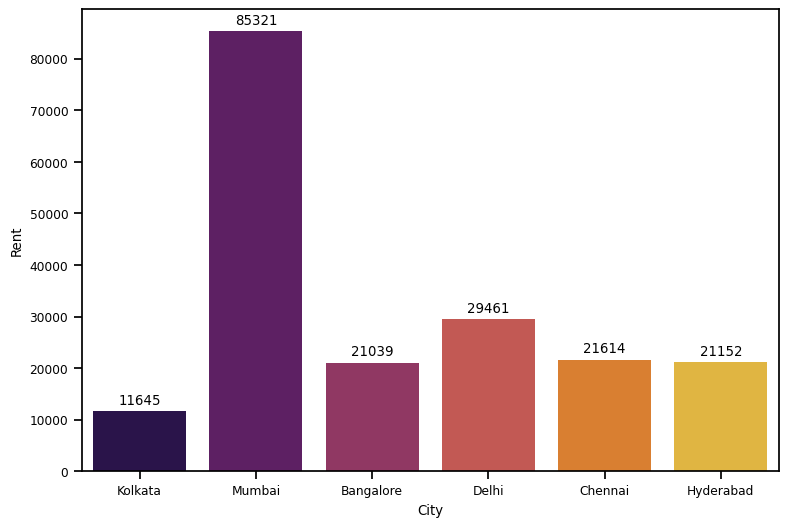

In [27]:
# Plotting City vs Rent
sns.set_context('notebook', font_scale= 0.8)
plt.figure(figsize=(9,6))

ax = sns.barplot(x=df_housing_2['City'], y=df_housing_2['Rent'], palette='inferno', ci=None)
plt.ylabel('Rent')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(height, xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', color='Black')

plt.show()

Mumbai has highest rent among other cities, followed by Delhi and Chennai

/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


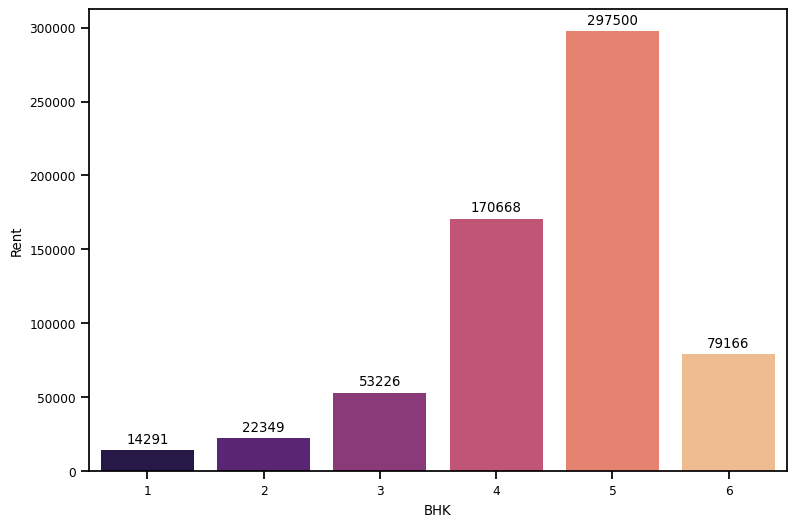

In [28]:
# Plotting BHK vs Rent
sns.set_context('notebook', font_scale=0.8)
plt.figure(figsize=(9,6))

ax = sns.barplot(x=df_housing_2['BHK'], y=df_housing_2['Rent'], palette='magma', ci=None)
plt.ylabel('Rent')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(height, xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', color='Black')

plt.show()

Average rent of 5 BHK is 297500, this is also the highest among others.

/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


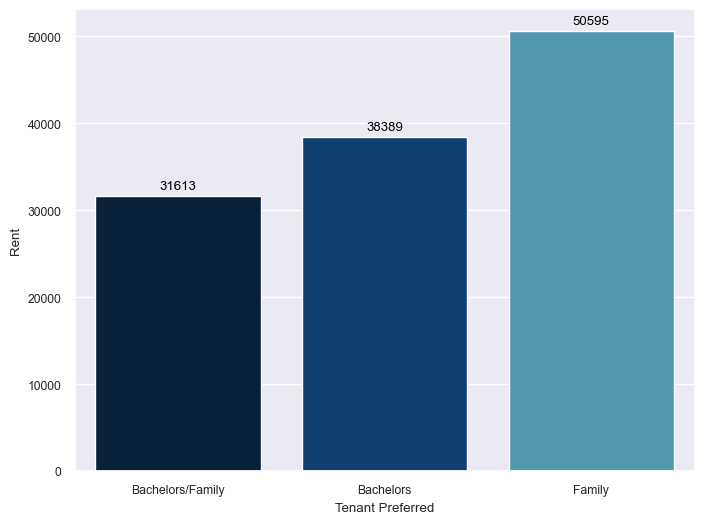

In [29]:
# Plotting Tenant Preferred vs Rent
sns.set(rc={'figure.figsize':(8,6)}, font_scale=0.8)

# Plotting Tenant Preferred vs Rent
ax = sns.barplot(x=df_housing_2['Tenant Preferred'], y=df_housing_2['Rent'], palette='ocean', ci=None)
plt.ylabel('Rent')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(height, xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', color='Black')

plt.show()

Average rent for family is 50595, this is also the highest among two other tenant types. 

/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


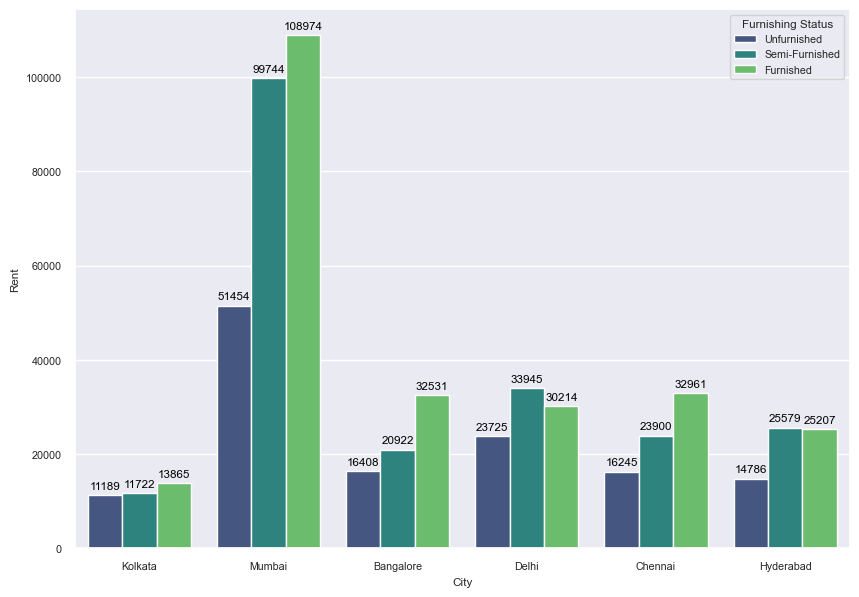

In [30]:
# Plotting Tenant city vs Rent based on furnished status
sns.set(rc={'figure.figsize':(10,7)}, font_scale= 0.7)

# Plotting Tenant Preferred vs Rent
ax = sns.barplot(x=df_housing_2['City'], y=df_housing_2['Rent'],hue = df_housing_2['Furnishing Status'] , palette='viridis', ci=None)
plt.ylabel('Rent')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(height, xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', color='Black')

plt.show()

For unfurnished, semi-furnished, furnished, Mumbai has the highest rent. Also in each city furnished flat has highest rent. 

/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


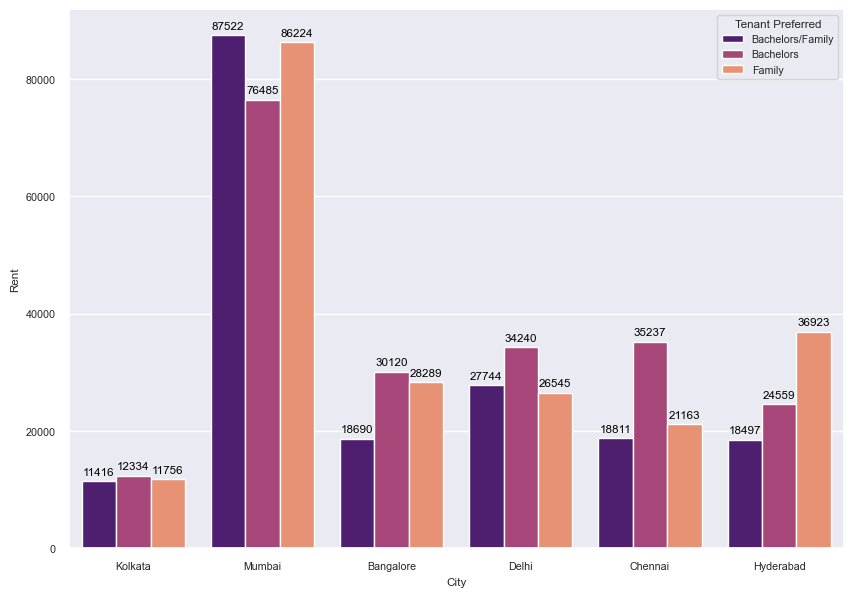

In [31]:
# Plotting Tenant city vs Rent based on tenant prefered
sns.set(rc={'figure.figsize':(10,7)}, font_scale= 0.7)

# Plotting Tenant Preferred vs Rent
ax = sns.barplot(x=df_housing_2['City'], y=df_housing_2['Rent'],hue = df_housing_2['Tenant Preferred'] , palette='magma', ci=None)
plt.ylabel('Rent')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(height, xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', color='Black')

plt.show()

In Bangalore, Delhi, Chennai, Mumbai, Kolkata families have to pay comparaively less rent than bachelors.

/Users/sahelidutta/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":


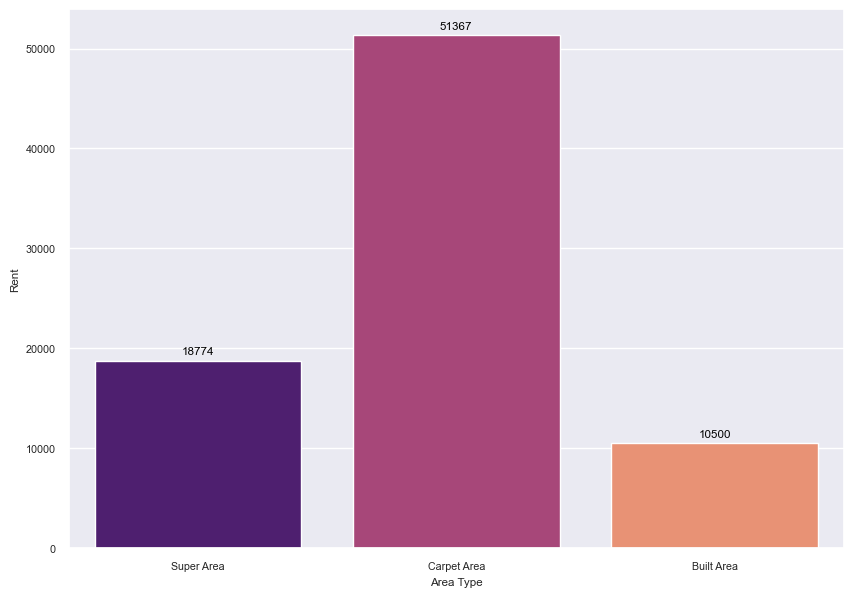

In [32]:
# Plotting Tenant Area type vs Rent
sns.set(rc={'figure.figsize':(10,7)}, font_scale= 0.7)

# Plotting Tenant Preferred vs Rent
ax = sns.barplot(x=df_housing_2['Area Type'], y=df_housing_2['Rent'],palette='magma', ci=None)
plt.ylabel('Rent')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(height, xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', color='Black')

plt.show()

## Feature Engineering

In [33]:
# Dropping less important features and non tranformed features
df_housing_2 = df_housing_2.drop(['Area Locality', 'Rent', 'Size', 'Point of Contact'], axis = 'columns')

In [34]:
# Checking correlation
df_housing_2.corr()

,BHK,Bathroom,BoxCox_Rent,BoxCox_Size
BHK,1.000000,0.791992,0.585839,0.698333
Bathroom,0.791992,1.000000,0.669723,0.693497
BoxCox_Rent,0.585839,0.669723,1.000000,0.536253
BoxCox_Size,0.698333,0.693497,0.536253,1.000000


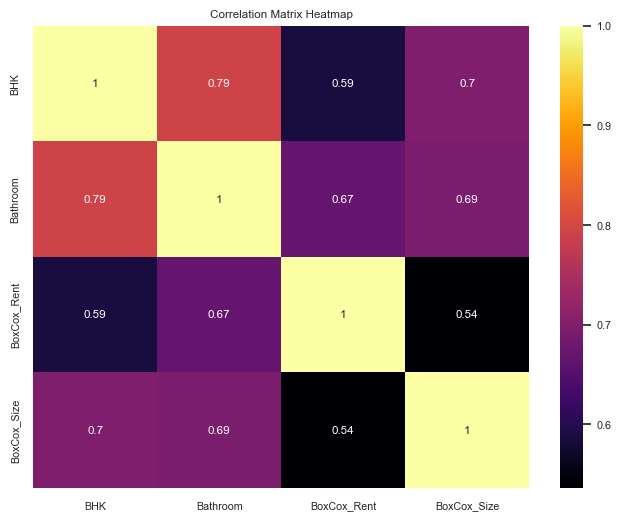

In [35]:
# Selecting relevant columns for correlation analysis
df_corr = df_housing_2[['BHK','Bathroom', 'BoxCox_Rent', 'BoxCox_Size']]

# Creating correlation matrix
corr_matrix = df_corr.corr()

# Set figure size
plt.figure(figsize=(8, 6))

# Creating heatmap with correlation values
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

# Adding title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()

In [36]:
split_data = df_housing_2['Floor'].str.split(' out of ', expand=True)
split_data = split_data.rename(columns={0:'Floor Level', 1:'Total Floors'})

# convert 'Ground', 'Lower Basement' and 'Upper Basement' to 0, -1 and -2 respectively
split_data.loc[split_data['Floor Level'] == 'Ground', 'Floor Level'] = '0'
split_data.loc[split_data['Floor Level'] == 'Lower Basement', 'Floor Level'] = '-1'
split_data.loc[split_data['Floor Level'] == 'Upper Basement', 'Floor Level'] = '-2'

# convert the remaining values to integers
split_data['Floor Level'] = pd.to_numeric(split_data['Floor Level'], errors='coerce')
split_data['Total Floors'] = pd.to_numeric(split_data['Total Floors'], errors='coerce')

df_housing_2.drop('Floor', axis=1, inplace=True)
df_housing_2 = df_housing_2.join(split_data)


In [37]:
df_housing_2.tail()

,Posted On,BHK,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,BoxCox_Rent,BoxCox_Size,Floor Level,Total Floors
4627,2022-05-18,2,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,2.854800,26.927612,3,5.0
4628,2022-05-15,3,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,2.878052,34.692764,1,4.0
4629,2022-07-10,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,2.883793,33.054371,3,5.0
4630,2022-07-06,3,Carpet Area,Hyderabad,Semi-Furnished,Family,2,2.890919,31.251335,23,34.0
4631,2022-05-04,2,Carpet Area,Hyderabad,Unfurnished,Bachelors,2,2.854800,26.927612,4,5.0


In [38]:
# Extract year, month, and day as separate columns
df_housing_2['year'] = df_housing_2['Posted On'].dt.year
df_housing_2['month'] = df_housing_2['Posted On'].dt.month
df_housing_2['day'] = df_housing_2['Posted On'].dt.day

# Drop the original Posted On column
df_housing_2 = df_housing_2.drop('Posted On', axis=1)

# Print the first five rows to check the changes
print(df_housing_2.head())

   BHK    Area Type     City Furnishing Status  Tenant Preferred  Bathroom  \
0    2   Super Area  Kolkata       Unfurnished  Bachelors/Family         2   
1    2   Super Area  Kolkata    Semi-Furnished  Bachelors/Family         1   
2    2   Super Area  Kolkata    Semi-Furnished  Bachelors/Family         1   
3    2   Super Area  Kolkata       Unfurnished  Bachelors/Family         1   
4    2  Carpet Area  Kolkata       Unfurnished         Bachelors         1   

   BoxCox_Rent  BoxCox_Size  Floor Level  Total Floors  year  month  day  
0     2.837715    27.892154            0           2.0  2022      5   18  
1     2.865584    24.785524            1           3.0  2022      5   13  
2     2.859620    26.927612            1           3.0  2022      5   16  
3     2.837715    24.785524            1           2.0  2022      7    4  
4     2.824099    25.351850            1           2.0  2022      5    9  


Extract features such as year, month, day, and day of the week from the "Posted On" column. These features might be useful in identifying seasonal trends in the housing market or patterns in the frequency of postings

In [39]:
# Checking for duplicates 
df_housing_2.duplicated().sum()

10

In [40]:
df_housing_2 = df_housing_2.drop_duplicates()

In [41]:
# Checking for Null values
print(df_housing_2.isnull().sum())

BHK                  0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
BoxCox_Rent          0
BoxCox_Size          0
Floor Level          0
Total Floors         4
year                 0
month                0
day                  0
dtype: int64


In [42]:
# Drop all rows that contain at least one null value
df_housing_2.dropna(inplace=True)

## One hot encoding for Area Type, City, Furnishing Status, Tenant Preferred

In [43]:
def one_hot_encode(df, cols):
    for col in cols:
        # Create one-hot encoded matrix for the column
        one_hot = pd.get_dummies(df[col], prefix=col)
        
        # Drop the original categorical column from the dataframe
        df = df.drop(col, axis=1)
        
        # Concatenate the one-hot encoded matrix with the dataframe
        df = pd.concat([df, one_hot], axis=1)
    
    return df

In [44]:
df_housing_2 = one_hot_encode(df_housing_2, ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred'])

In [45]:
df_housing_2.head()

,BHK,Bathroom,BoxCox_Rent,BoxCox_Size,Floor Level,Total Floors,year,month,day,Area Type_Built Area,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,2,2.837715,27.892154,0,2.0,2022,5,18,0,...,0,0,1,0,0,0,1,0,1,0
1,2,1,2.865584,24.785524,1,3.0,2022,5,13,0,...,0,0,1,0,0,1,0,0,1,0
2,2,1,2.859620,26.927612,1,3.0,2022,5,16,0,...,0,0,1,0,0,1,0,0,1,0
3,2,1,2.837715,24.785524,1,2.0,2022,7,4,0,...,0,0,1,0,0,0,1,0,1,0
4,2,1,2.824099,25.351850,1,2.0,2022,5,9,0,...,0,0,1,0,0,0,1,1,0,0


In [46]:
df_housing_2.columns

Index(['BHK', 'Bathroom', 'BoxCox_Rent', 'BoxCox_Size', 'Floor Level',
       'Total Floors', 'year', 'month', 'day', 'Area Type_Built Area',
       'Area Type_Carpet Area', 'Area Type_Super Area', 'City_Bangalore',
       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'Furnishing Status_Furnished',
       'Furnishing Status_Semi-Furnished', 'Furnishing Status_Unfurnished',
       'Tenant Preferred_Bachelors', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family'],
      dtype='object')

## Train Test Split

In [47]:
# Defining input features

X = df_housing_2.drop(['BoxCox_Rent'], axis= 'columns')
X.head()

,BHK,Bathroom,BoxCox_Size,Floor Level,Total Floors,year,month,day,Area Type_Built Area,Area Type_Carpet Area,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,2,27.892154,0,2.0,2022,5,18,0,0,...,0,0,1,0,0,0,1,0,1,0
1,2,1,24.785524,1,3.0,2022,5,13,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,1,26.927612,1,3.0,2022,5,16,0,0,...,0,0,1,0,0,1,0,0,1,0
3,2,1,24.785524,1,2.0,2022,7,4,0,0,...,0,0,1,0,0,0,1,0,1,0
4,2,1,25.351850,1,2.0,2022,5,9,0,1,...,0,0,1,0,0,0,1,1,0,0


In [48]:
# Defining target variable

Y = df_housing_2.BoxCox_Rent
Y.head()

0    2.837715
1    2.865584
2    2.859620
3    2.837715
4    2.824099
Name: BoxCox_Rent, dtype: float64

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [50]:
# Select columns to be scaled
cols_to_scale = ['BHK', 'Bathroom', 'BoxCox_Size', 'Floor Level', 'Total Floors']

# Perform scaling
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [51]:
X_train.head()

,BHK,Bathroom,BoxCox_Size,Floor Level,Total Floors,year,month,day,Area Type_Built Area,Area Type_Carpet Area,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
257,-0.123560,-1.099061,-0.886235,-0.254672,-0.419567,2022,6,24,0,1,...,0,0,1,0,0,0,1,1,0,0
295,1.082546,-1.099061,-0.099269,-0.598527,-0.316305,2022,5,14,0,0,...,0,0,1,0,0,0,1,0,1,0
2661,-1.329665,-1.099061,-1.029578,-0.254672,-0.316305,2022,7,5,0,0,...,1,0,0,0,1,0,0,0,1,0
2094,-0.123560,0.022919,-0.007232,-0.254672,-0.109781,2022,6,9,0,1,...,0,0,0,0,0,1,0,0,1,0
3413,1.082546,1.144899,1.277789,-0.426599,-0.213043,2022,5,6,0,0,...,0,0,0,0,0,1,0,0,1,0


In [52]:
X_train.shape

(3231, 23)

In [53]:
X_test.shape

(1386, 23)

## Decision Tree from Sklearn library

In [54]:
# Set the hyperparameters for the DecisionTreeRegressor
dt_params = {'criterion': 'squared_error', 'splitter': 'best'} 

# Train Decision Tree model
dt_clf = DecisionTreeRegressor(**dt_params, random_state=42)
dt_clf.fit(X_train, Y_train)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
dt_score = dt_clf.score(X_test, Y_test)
print(f"Decision Tree R-squared score on test data: {dt_score}")

# Compute the predicted target values for the test dataset using the trained decision tree model
Y_pred = dt_clf.predict(X_test)

# Compute the mean squared error (MSE) of the model predictions
mse = mean_squared_error(Y_test, Y_pred)

# Compute the root mean squared error (RMSE) of the model predictions
rmse = np.sqrt(mse)

# Compute the mean absolute error (MAE) of the model predictions
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"Decision Tree MSE on test data: {mse:.5f}")
print(f"Decision Tree RMSE on test data: {rmse:.5f}")
print(f"Decision Tree MAE on test data: {mae:.5f}")


Decision Tree R-squared score on test data: 0.5513641980995945
Decision Tree MSE on test data: 0.00044
Decision Tree RMSE on test data: 0.02096
Decision Tree MAE on test data: 0.01553


## K-Fold Cross Validation

In [55]:
# Create the decision tree model
dt = DecisionTreeRegressor(**dt_params)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Evaluate the decision tree model using cross-validation
scores = cross_val_score(dt, X, Y, cv=cv)

# Print the cross-validation scores
print("Decision Tree Cross-Validation Scores:", scores)
print("Mean R-squared:", scores.mean())

Decision Tree Cross-Validation Scores: [0.58394346 0.55493831 0.55880863 0.57940527 0.58335492]
Mean R-squared: 0.5720901180237228


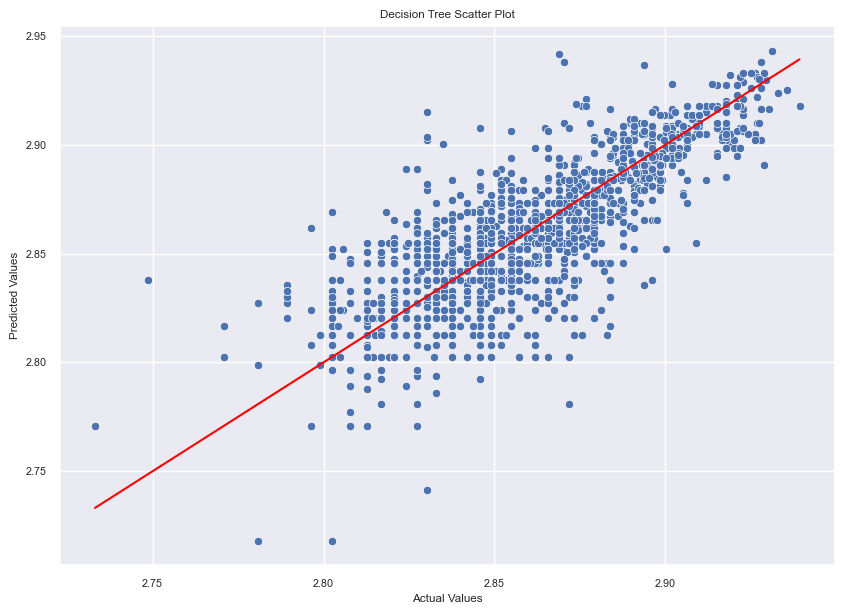

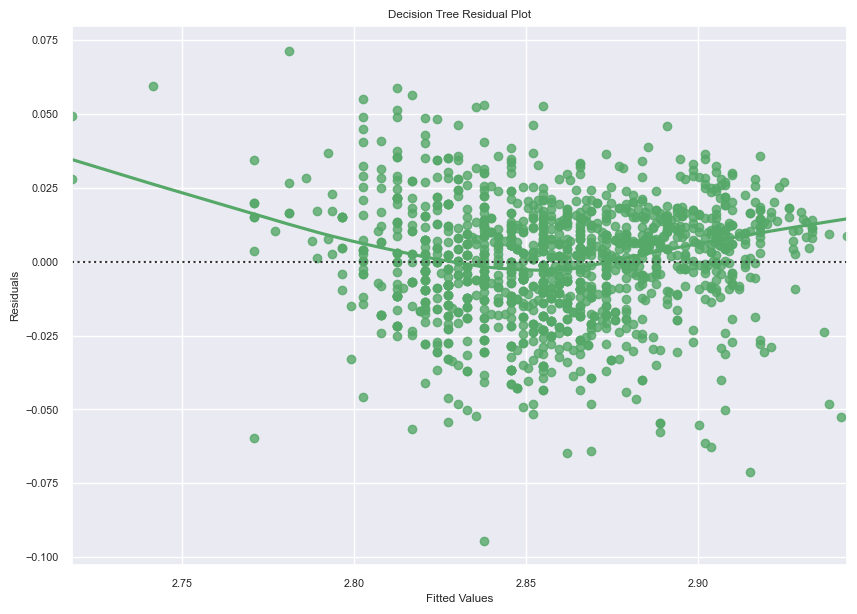

In [56]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('Decision Tree Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('Decision Tree Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Decision Tree from XGBoost library

In [68]:
# Set the hyperparameters for the XGBoost decision tree
xgb_params = {'booster': 'gbtree','objective': 'reg:squarederror', 'random_state': 42}

# Train XGBoost decision tree model
xgb_clf = XGBRegressor(**xgb_params)
xgb_clf.fit(X_train, Y_train)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
xgb_score = xgb_clf.score(X_test, Y_test)
print(f"XGBoost Decision Tree R-squared score on test data: {xgb_score}")

# Compute the predicted target values for the test dataset using the trained XGBoost decision tree model
Y_pred = xgb_clf.predict(X_test)

# Compute the mean squared error (MSE) of the model predictions
mse = mean_squared_error(Y_test, Y_pred)

# Compute the root mean squared error (RMSE) of the model predictions
rmse = np.sqrt(mse)

# Compute the mean absolute error (MAE) of the model predictions
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"XGBoost Decision Tree MSE on test data: {mse:.5f}")
print(f"XGBoost Decision Tree RMSE on test data: {rmse:.5f}")
print(f"XGBoost Decision Tree MAE on test data: {mae:.5f}")


XGBoost Decision Tree R-squared score on test data: 0.7760200114986203
XGBoost Decision Tree MSE on test data: 0.00022
XGBoost Decision Tree RMSE on test data: 0.01481
XGBoost Decision Tree MAE on test data: 0.01110


## K-Fold Cross Validation

In [69]:
# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Train and evaluate the XGBoost Decision Tree model using cross-validation
score = cross_val_score(xgb_clf, X, Y, cv=cv, scoring='r2')

# Print the cross-validation scores
print("XGBoost Decision Tree Cross-Validation Scores:", score)
print("Mean R-squared:", score.mean())

XGBoost Decision Tree Cross-Validation Scores: [0.76032994 0.75111058 0.7514529  0.76188652 0.77363239]
Mean R-squared: 0.7596824668311274


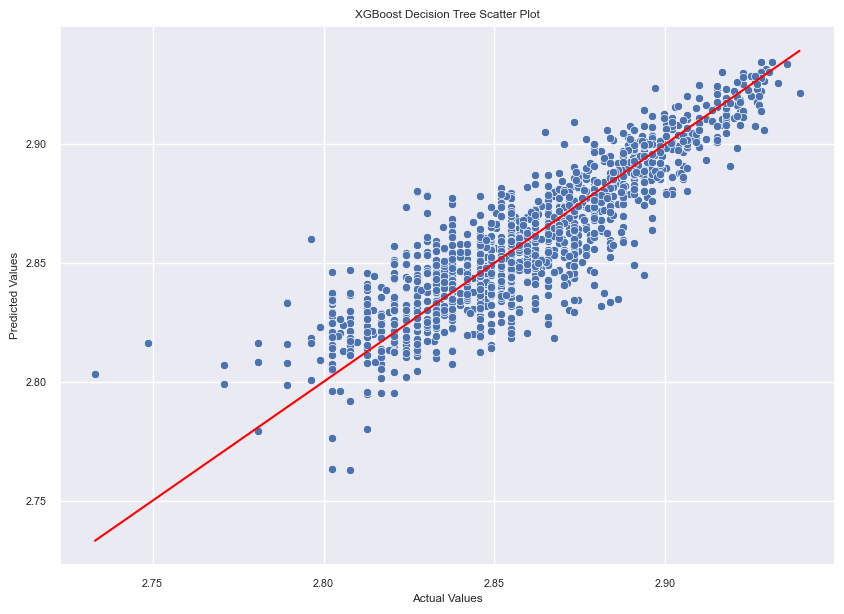

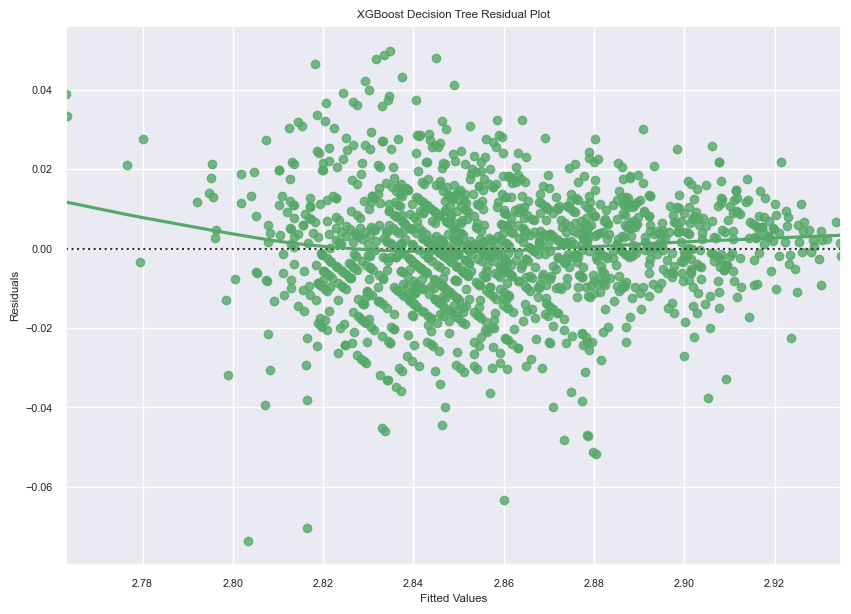

In [70]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('XGBoost Decision Tree Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('XGBoost Decision Tree Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Random Forest from XGBoost library

In [60]:
import xgboost as xgb

# Set the hyperparameters for the XGBoost random forest
xgb_params = {'objective': 'reg:squarederror', 'random_state': 42}

# Train XGBoost random forest model
xgb_rf_clf = xgb.XGBRFRegressor(**xgb_params)
xgb_rf_clf.fit(X_train, Y_train)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
xgb_rf_score = xgb_rf_clf.score(X_test, Y_test)
print(f"XGBoost Random Forest R-squared score on test data: {xgb_rf_score}")

# Compute the predicted target values for the test dataset using the trained XGBoost random forest model
Y_pred = xgb_rf_clf.predict(X_test)

# Compute the mean squared error (MSE) of the model predictions
mse = mean_squared_error(Y_test, Y_pred)

# Compute the root mean squared error (RMSE) of the model predictions
rmse = np.sqrt(mse)

# Compute the mean absolute error (MAE) of the model predictions
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"XGBoost Random Forest MSE on test data: {mse:.5f}")
print(f"XGBoost Random Forest RMSE on test data: {rmse:.5f}")
print(f"XGBoost Random Forest MAE on test data: {mae:.5f}")

XGBoost Random Forest R-squared score on test data: 0.7663358475200389
XGBoost Random Forest MSE on test data: 0.00023
XGBoost Random Forest RMSE on test data: 0.01513
XGBoost Random Forest MAE on test data: 0.01143


## Using K-fold cross validation

In [61]:
# Define the cross-validation iterator
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Train and evaluate the XGBoost random forest model using cross-validation
xgb_rf_cv = xgb.XGBRFRegressor(**xgb_params)
cv_score = cross_val_score(xgb_rf_cv, X, Y, cv=cv, scoring='r2')

# Print the cross-validation scores
print("XGBoost Random Forest Cross-Validation Scores:", cv_score)
print("Mean R-squared:", cv_score.mean())

XGBoost Random Forest Cross-Validation Scores: [0.74237678 0.76099288 0.7537331  0.75745993 0.77911596]
Mean R-squared: 0.7587357291644775


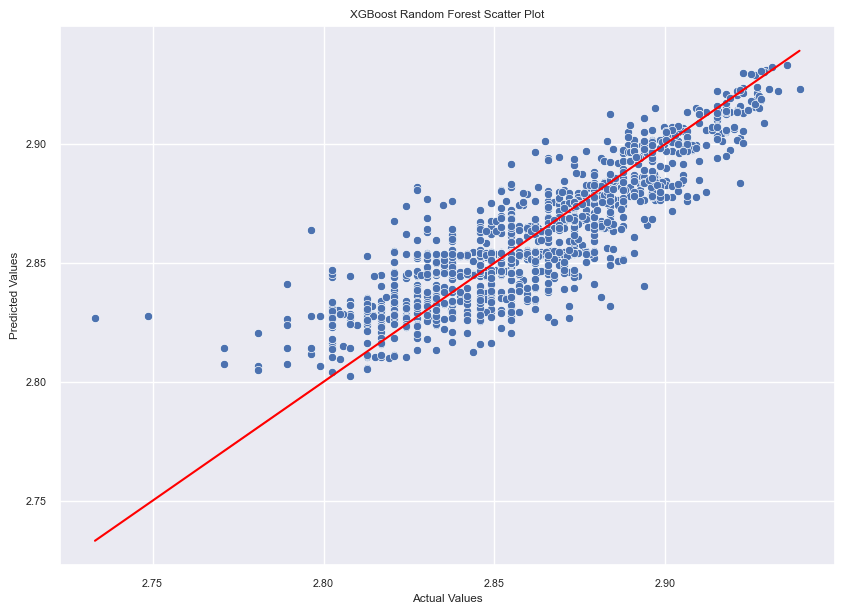

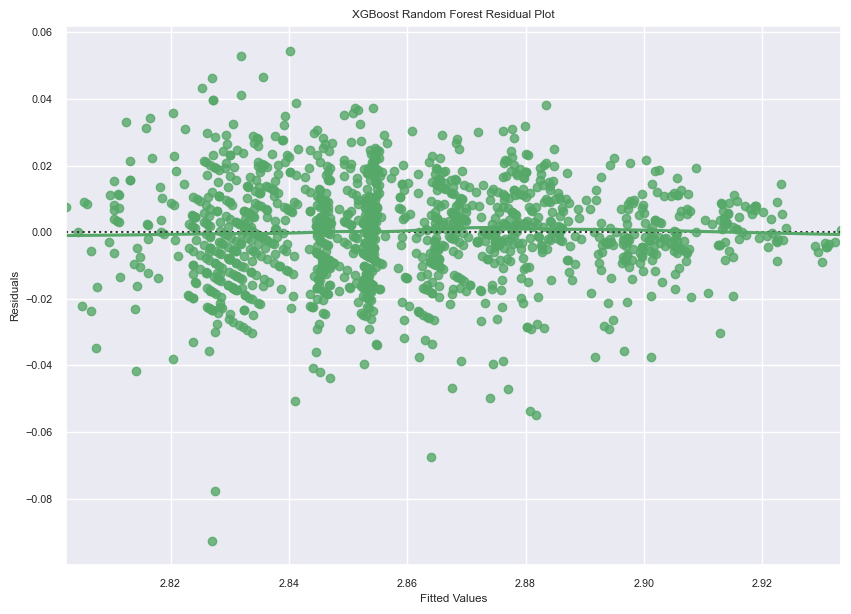

In [62]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('XGBoost Random Forest Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('XGBoost Random Forest Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## XGBoost from XGBoost library

In [63]:
# Set the hyperparameters for the XGBoost model
xgb_params = {'objective': 'reg:squarederror', 'random_state': 42}

# Train XGBoost model
xgb_clf = xgb.XGBRegressor(**xgb_params)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
xgb_clf.fit(X_train, Y_train)

# Compute the predicted target values for the test dataset using the trained XGBoost model
xgb_score = xgb_clf.score(X_test, Y_test)

print(f"XGBoost R-squared score on test data: {xgb_score}")
Y_pred = xgb_clf.predict(X_test)

# Compute the mean squared error (MSE), RMSE, MAE of the model predictions
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"XGBoost MSE on test data: {mse:.5f}")
print(f"XGBoost RMSE on test data: {rmse:.5f}")
print(f"XGBoost MAE on test data: {mae:.5f}")

XGBoost R-squared score on test data: 0.7760200114986203
XGBoost MSE on test data: 0.00022
XGBoost RMSE on test data: 0.01481
XGBoost MAE on test data: 0.01110


## K-fold cross validation 

In [64]:
# Define the cross-validation iterator
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Train and evaluate the XGBoost model using cross-validation
score = cross_val_score(xgb_clf, X, Y, cv=cv, scoring='r2')

# Print the cross-validation scores
print("XGBoost Cross-Validation Scores:", score)
print("Mean R-squared:", score.mean())

XGBoost Cross-Validation Scores: [0.76032994 0.75111058 0.7514529  0.76188652 0.77363239]
Mean R-squared: 0.7596824668311274


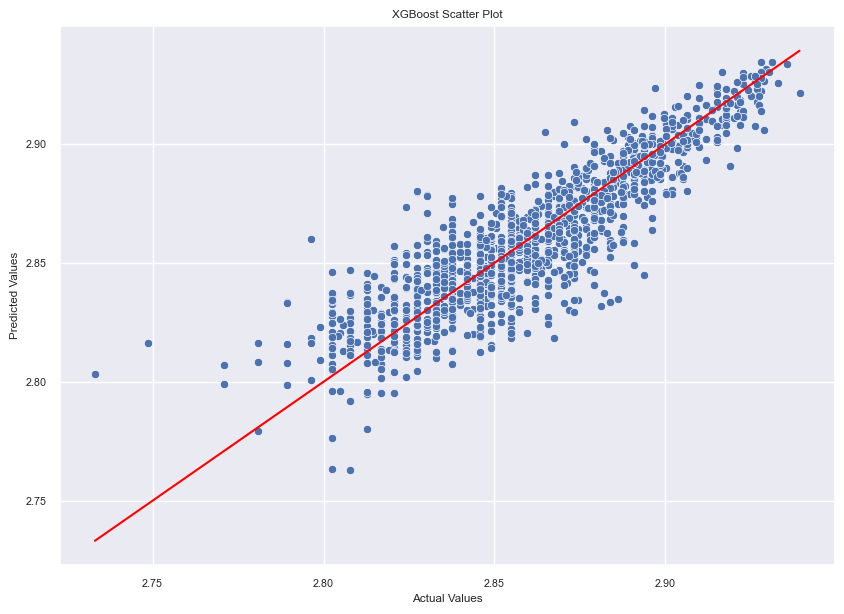

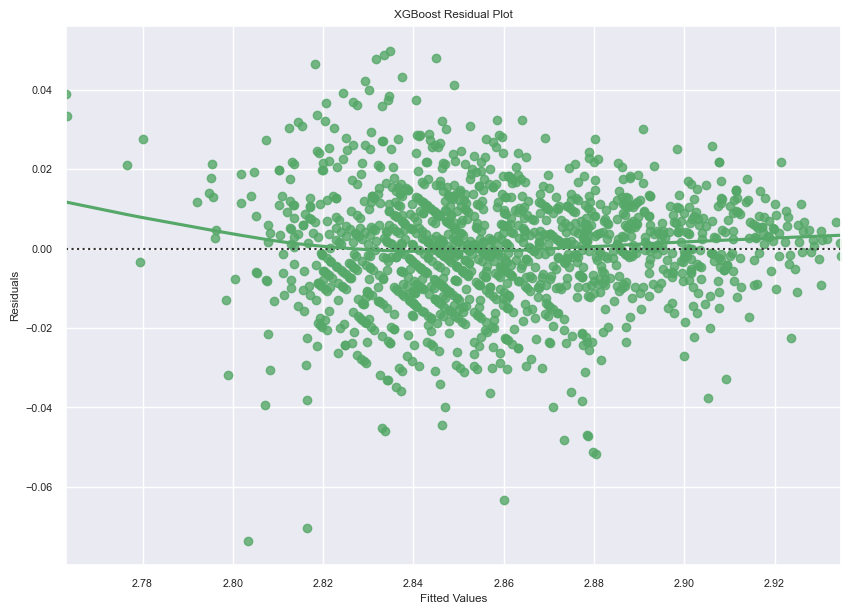

In [65]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('XGBoost Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('XGBoost Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [66]:
# RandomsearchCV is used for 2 different techniques 
def find_best_model_using_randomsearchcv(X, Y):
    algos = {
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150, 200],
                'max_features': ['sqrt', 'log2'],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.05, 0.1, 0.15, 0.2],
                'max_depth': [3, 4, 5, 6],
                'n_estimators': [50, 100, 150, 200],
                'objective': ['reg:squarederror']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, n_iter=5, random_state=0, return_train_score=False)
        rs.fit(X,Y)
        mean_test_score = np.mean(rs.cv_results_['mean_test_score'])
        print(f"{algo_name} Mean Cross-Validation Score: {mean_test_score:.2f}")
        Y_pred = rs.predict(X)
        r_squared = rs.best_score_
        mse = mean_squared_error(Y, Y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(Y, Y_pred)
        #print(f"{algo_name} Cross-Validation Score: {r_squared:.2f}")
        print(f"{algo_name} Cross-Validation Scores: {rs.cv_results_['mean_test_score']}")
        scores.append({
            'model': algo_name,
            'best_score': r_squared,
            'best_params': rs.best_params_,
            'mse': mse,
            'rmse': rmse,
            'mae': mae
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'mse', 'rmse', 'mae'])

    
find_best_model_using_randomsearchcv(X, Y)


random_forest Mean Cross-Validation Score: 0.78
random_forest Cross-Validation Scores: [0.77634011 0.78159445 0.77704147 0.77473493 0.77596177]
xgboost Mean Cross-Validation Score: 0.78
xgboost Cross-Validation Scores: [0.78357974 0.78626459 0.77902392 0.77460149 0.78678184]


,model,best_score,best_params,mse,rmse,mae
0,random_forest,0.781594,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.00003,0.005486,0.004020
1,xgboost,0.786782,"{'objective': 'reg:squarederror', 'n_estimator...",0.00017,0.013036,0.009719


random_forest Mean Cross-Validation Score: 0.78
random_forest Cross-Validation Scores: [0.77678092 0.78206949 0.77826832 0.77450611 0.77670038]
xgboost Mean Cross-Validation Score: 0.78
xgboost Cross-Validation Scores: [0.78357974 0.78626459 0.77902392 0.77460149 0.78678184]


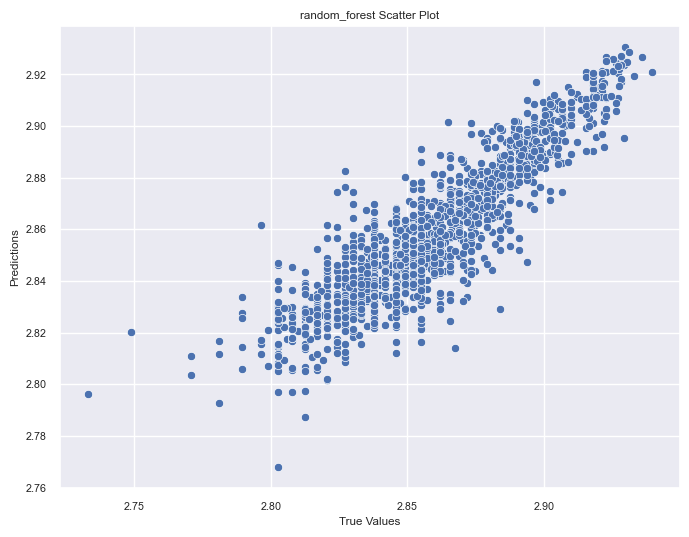

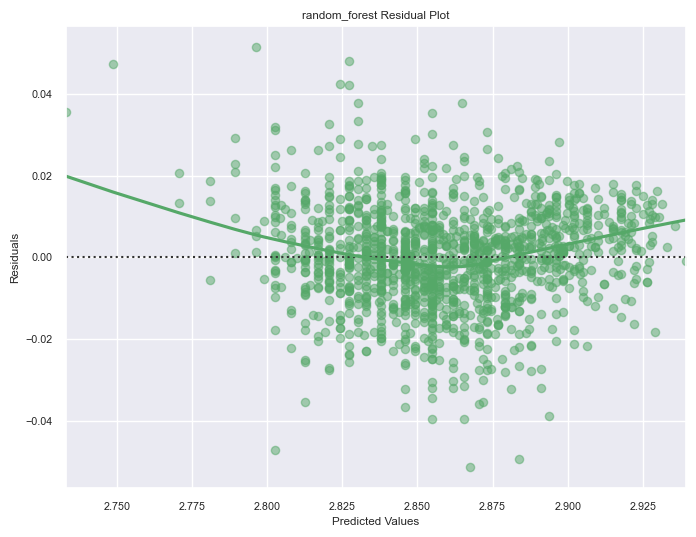

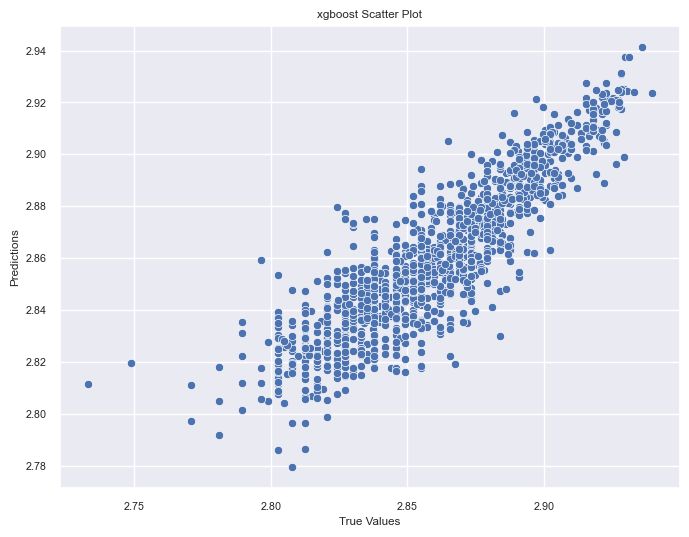

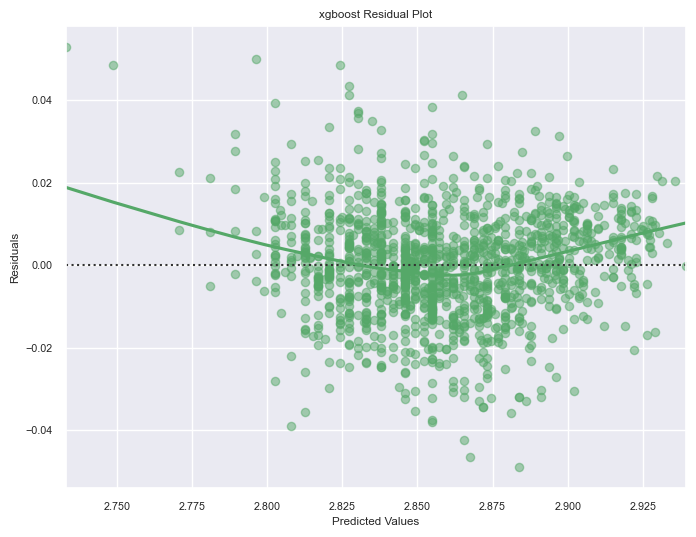

In [67]:
# define a function to create scatter plots
def scatter_plot(Y_test, Y_pred, title):
    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(x=Y_test, y=Y_pred)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predictions')
    ax.set_title(title)
    plt.show()

# define a function to create residual plots
def residual_plot(Y_test, Y_pred, title):
    plt.figure(figsize=(8, 6))
    ax = sns.residplot(x=Y_test, y=Y_pred, lowess=True, color="g", scatter_kws={'s': 35, 'alpha': 0.5})
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title(title)
    plt.show()

# get the best models using RandomizedSearchCV
best_models = find_best_model_using_randomsearchcv(X, Y)

# loop through the best models and generate scatter and residual plots
for _, row in best_models.iterrows():
    model_name = row['model']
    best_params = row['best_params']
    
    if model_name == 'random_forest':
        model = RandomForestRegressor(**best_params)
    elif model_name == 'xgboost':
        model = XGBRegressor(**best_params)
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    scatter_plot(Y_test, Y_pred, f"{model_name} Scatter Plot")
    residual_plot(Y_test, Y_pred, f"{model_name} Residual Plot")
